Jay Desmarais CMSC 320 Project 1

Part 1: Data scraping and preparation

Step 1: Scrape your competitor's data

In [117]:
# 1. Necessary utilities are imported.
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
from bs4 import BeautifulSoup

In [118]:
# 2. HTTP GET request from a mirror of a SpaceWeatherLive.com archive.
r = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html")
# 3. The text is extracted from the HTTP GET request response.
extract = r.content
# 4. Raw content from SpaceWatherLive.com is parsed.
root = BeautifulSoup(extract, 'lxml')
# 5. The HTML content is passed into Prettify so we can locate the desired content.
pretty = root.prettify()
# 6. The HTML Table is found and isolated as a str type.
html = str(root.find("table"))
# 7. The HTML is converted into a pandas DataFrame.
swl = pd.read_html(html)[0]
# 8. Names are assigned to all columns of the DataFrame.
swl.columns = [
    'rank',
    'x_classification',
    'date',
    'region', 
    'start_time',
    'max_time',
    'end_time',
    'movie'
]
# Display the final DataFrame at the end of this step.
swl

,rank,x_classification,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


Step 2: Tidy the top 50 solar flare data

In [119]:
# 1. The movie column is dropped from the DataFrame.
swl.drop('movie', axis=1, inplace=True)
# 2. Each of the time columns in the DataFrame are combined with the date column to create new datetime columns.
for column in ['end', 'max', 'start']:
    swl.insert(
        loc = 2,
        column = column + '_datetime', 
        value = pd.to_datetime(swl['date'] + swl[column + '_time'], format='%Y/%m/%d%H:%M')
    )
    # The time columns are dropped from the DataFrame.
    swl.drop(column + '_time', axis = 1, inplace=True)
# The date column is dropped from the DataFrame.
swl.drop('date', axis=1, inplace=True)
# 3. Remove or replace any "+" in the x_classification column if the preceding number contains a decimal place or not, resepctively.
swl = swl\
    .replace(regex={r'(^X{1}[0-9].\.[0-9]?)\+$' : r'\1', r'(^X{1}[0-9]+)\+$' : r'\1.0', r'(^X{1}[0-9\.]+)\+$' : r'\1'})
# 4. Any instances of "-" in the DataFrame are replaced with NaN.
swl = swl.replace('-', np.nan)
# Display the final DataFrame at the end of this step.
swl

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


Step 3: Scrape the NASA data

In [120]:
# 1. HTTP GET request from a mirror of a NASA's catalog.
r = requests.get("https://cmsc320.github.io/files/waves_type2.html")
# Raw content from SpaceWatherLive.com is parsed.
root = BeautifulSoup(r.content, 'html')
# The HTML is found and isolated by line as a list strings.
content = str.split(str(root), '\n')
# 2. Regex is defined to find and isolate different columns.
regex = re\
    .compile(r'(\d{4}\/\d{2}\/\d{2}) (\d{2}:\d{2}) (\d{2}\/\d{2}) (\d{2}:\d{2}) *(?:<[^>]*>)?(\w*|\?*)(?:<[^>]*>)? *(?:<[^>]*>)?(\w+|\?{4})(?:<[^>]*>)? *(\w+\??|-{6}) *(\w+\??|-{5}) *(\w+\.?\d?|-{4}) *(?:<[^>]*>)?(\d+\/\d+|-{2}\/-{2}|\w)(?:<[^>]*>)? *(\d{2}:\d{2}|-{2}:-{2}|\w+) *(\w+|-+) *((?:&gt\;)?\d+|-+) *(?:<[^>]*>)?(\w+|-{2}\/-{2}|-{4})(?:<[^>]*>)?')
# If a line matches the above regex, the columns are seperated and added to a new list.
html = []
for line in content:
    #print(line)
    if regex.match(line):
        result = regex.search(line)
        line = result.groups()
        html.append(line)
# The column names to be used to create the DataFrame.
columns= [
    'start_date',
    'start_time',
    'end_date',
    'end_time',
    'start_frequency',
    'end_frequency',
    'flare_location',
    'flare_region',
    'flare_classification',
    'cme_date',
    'cme_time',
    'cme_angle',
    'cme_width',
    'cme_speed'
]
# The HTML is converted into a pandas DataFrame using the above DataFrame.
nasa = pd.DataFrame(html, columns = columns)
# Display the final DataFrame at the end of this step.
nasa

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252


Step 4: Tidy the NASA table

In [121]:
# 1. All missing entries are replaced with NaN.
nasa = nasa.replace(regex=r'--:--|--/--|-----?-?|\?\?\?\?|BACK|altr|DSF|FILA|DIM|EP\??|^h$', value=np.nan)
# Clean up the classification entries missing a 0 after the decimal place
nasa = nasa.replace(regex={r'(^X[0-9]{2})\.$' : r'\1.0'})
# 2. The entries with Halo flares are replaced with NaN.
nasa['is_halo'] = nasa['cme_angle'].apply(lambda x: True if x == 'Halo' else False)
# The same entries as above are specified as Halo flares in a new is_halo column.
nasa['cme_angle'] = nasa['cme_angle'].apply(lambda x: np.nan if x == 'Halo' else x)
# 3. The entries with lower bounds in the width column get the ">" removed.
nasa['width_lower_bound'] = nasa['cme_width'].apply(lambda x: True if '&gt;' in str(x) else False)
# The same entries as above are specified as lower bounds in a new width_lower_bound column.
nasa['cme_width'] = nasa['cme_width'].str.extract('(\d+)', expand=False)
# 4. Years are added to the 'end_date' and 'cme_date' columns.
for date in ['end', 'cme']:
    nasa[date + '_date'] = nasa['start_date'].str.extract('(\d{4})', expand=False) + "/" + nasa[date + '_date']
# Each of the time columns in the DataFrame are combined with the date column to create new datetime columns.
for column in ['end', 'start', 'cme']:
    # Columns that specify 24:00 for time are changes to 00:00.
    nasa[column + '_time'] = nasa[column + '_time'].apply(lambda x: '00:00' if '24:00' in str(x) else x)
    nasa.insert(
        loc = 0 if not column == 'cme' else 7,
        column = column + '_datetime', 
        value = pd.to_datetime(nasa[column + '_date'] + nasa[column + '_time'], format='%Y/%m/%d%H:%M')
    )
    # The time columns are dropped from the DataFrame.
    nasa.drop(column + '_time', axis=1, inplace=True)
    # The date columns are dropped from the DataFrame.
    nasa.drop(column + '_date', axis=1, inplace=True)
# Display the final DataFrame at the end of this step.
nasa

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NaN,360,1418,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360,3163,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,False,False


Part 2: Analysis

Question 1: Replication

In [122]:
# All classifications that aren't rated X are downgraded to a 0.0 for sake of comparing the X classifactions flares.
x_class = nasa.replace(regex={r'^X([0-9]+\.[0-9])$' : r'\1', r'^[A-W][0-9]+\.[0-9]$' : 0.0, 'FILA' : 0.0})
# All entries are set to floats so they can be compares.
x_class = x_class.astype({'flare_classification': float}, errors='raise')
# The values are sorted based on their classification.
x_class = x_class.sort_values(by = ['flare_classification'], ascending = False)
# The first 50 results are returned.
x_class.head(50)

# The data here is very similar to that of SWL, but is lacking in some ways. Just taking a look at the flare_classification, 
# a few of the entries are slightly off or missing. The other good way to double check which flares correlate with each other
# is by looking at the region. If you look at both the classification and region, most match up with the exception of a few.
# For example, there are two flares rated at 17.0+ on the swl page, but only one on NASA. This being said, NASA seems to have 
# that same flare recorded by confirming dates and regions, but there is a lot of data missing hence a note from NASA that
# reads "LASCO_DATA_GAP" for a lack of observations. This lack in some data entries seems to make up for most discrepencies.

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,28.0,2003-11-04 19:54:00,NaN,360,2657,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,20.0,2001-04-02 22:06:00,261,244,2505,False,False
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,17.0,2003-10-28 11:30:00,NaN,360,2459,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,14.0,2001-04-15 14:06:00,245,167,1199,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,10.0,2003-10-29 20:54:00,NaN,360,2029,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,9.4,1997-11-06 12:10:00,NaN,360,1556,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,9.3,2017-09-06 12:24:00,NaN,360,1571,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,9.0,NaT,NaN,NaN,NaN,False,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,8.3,2017-09-10 16:00:00,NaN,360,3163,True,False
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,8.3,2003-11-02 17:30:00,NaN,360,2598,True,False


Question 2: Integration

In [123]:
arr = []
# Add the strongest connections to the list. These occured on the same day, are in the same region, and have an exact classification.
for i, nasa_row in nasa.iterrows():
    value = np.nan
    for j, swl_row in swl.iterrows():
        # This is where we check the strength of a 
        if nasa_row['start_datetime']\
            .date() == swl_row['start_datetime'].date() and \
            str(nasa_row['flare_region'])[-3:] == str(swl_row['region'])[-3:] and \
            str(nasa_row['flare_classification']) == (swl_row['x_classification']):
                value = swl_row['rank']
    arr.append(value)
# Add the next strongest connections to the list. These occured on the same day and either were in the same region or have a very close classification score.
for i, nasa_row in nasa.iterrows():
    # This if statement prevents the stronger connections from being overwritten.
    if np.isnan(arr[i]):
        value = np.nan
        for j, swl_row in swl.iterrows():
            if (str(nasa_row['flare_classification'])[:2] == str(swl_row['x_classification'])[:2] or \
                str(nasa_row['flare_region'])[-3:] == str(swl_row['region'])[-3:]) \
                and nasa_row['start_datetime'].date() == swl_row['start_datetime'].date():
                    # This if statement prevents multiple nasa points from mapping to a single swl entity.
                    if swl_row['rank'] in arr:
                        arr[arr.index(swl_row['rank'])] = np.nan
                        value = swl_row['rank']
                    else:
                        value = swl_row['rank']
            arr[i] = value
# Add the next strongest connections to the list. These supposedly occured on the days surrounding what was listed on WSL.
for i, nasa_row in nasa.iterrows():
    # This if statement prevents the stronger connections from being overwritten.
    if np.isnan(arr[i]):
        value = np.nan
        for j, swl_row in swl.iterrows():
            # Checking the for any data within a 2 week margin of error for recording the flare. 
            duration = nasa_row['start_datetime'].date() - swl_row['start_datetime'].date()
            if duration.days < 13 and duration.days > -13:
                # This if statement prevents multiple nasa points from mapping to a single swl entity.
                if not swl_row['rank'] in arr:
                    value = swl_row['rank']
            arr[i] = value
# Adding the mappings to the DataFrame and sorting it.       
nasa["swt_map"] = arr
nasa = nasa.sort_values(by = ['swt_map'], ascending = True)
nasa.head(50)
# Add the last strongest connections to the list. These entries were much further apart with much less in similar between the 1998 entries.
for i, nasa_row in nasa.iterrows():
    # This if statement prevents the stronger connections from being overwritten.
    if np.isnan(arr[i]):
        value = np.nan
        for j, swl_row in swl.iterrows():
            # Checking the for any data within a little over 2 month margin of error for recording the flare. 
            duration = nasa_row['start_datetime'].date() - swl_row['start_datetime'].date()
            if duration.days < 70 and duration.days > -70:
                # This if statement prevents multiple nasa points from mapping to a single swl entity.
                if not swl_row['rank'] in arr:
                    value = swl_row['rank']
            arr[i] = value
# Adding the mappings to the DataFrame and sorting it.       
nasa["swt_map"] = arr
nasa = nasa.sort_values(by = ['swt_map'], ascending = True)
nasa.head(50)

# To decide how to organize the matches between the two data sets, I wanted to get what seemed to be most acurate first, 
# so I started with the data with as much in common as possible, which meant looking for entries with multiple of the same
# pieces of information, namely the day it occured, the rating, and the region. After grabbing these matches, I broadened
# the criteria to get partial matches and things that were very simlar like classifications that were a decimal point off.
# From there, the data had very little in common so I switched to finding events that occured in the same general time frame,
# starting with events recorded 13 days apart and eventually to those in 1998 whose entries were a few months apart.

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,swt_map
211,2002-11-11 16:15:00,2002-11-11 17:50:00,14000,600,S13W60,10180,M1.8,2002-11-11 15:54:00,212,93,1083,False,False,1.0
74,2000-06-10 17:15:00,2000-06-10 18:45:00,10000,1000,N22W38,9026,M5.2,2000-06-10 17:08:00,NaN,360,1108,True,False,2.0
204,2002-09-27 13:35:00,2002-09-27 14:30:00,14000,8000,N13E45,10134,M1.8,2002-09-27 13:56:00,64,64,591,False,False,3.0
299,2005-07-13 14:15:00,2005-07-13 15:05:00,14000,1000,N11W90,10786,M5.0,2005-07-13 14:30:00,NaN,360,1423,True,False,4.0
84,2000-08-11 11:35:00,2000-08-11 11:59:00,2800,2000,NW90b,NaN,NaN,2000-08-11 07:31:00,273,70,1071,False,False,5.0
205,2002-10-13 18:10:00,2002-10-13 18:40:00,14000,4000,S07W54,10150,C4.7,2002-10-13 19:35:00,252,141,373,False,False,6.0
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,7.0
512,2017-07-23 05:27:00,2017-07-23 06:12:00,4400,900,NaN,NaN,NaN,2017-07-23 04:48:00,NaN,360,1848,True,False,8.0
313,2005-08-31 22:10:00,2005-08-31 23:00:00,14000,6000,NaN,NaN,NaN,2005-08-31 22:30:00,NaN,360,1808,True,False,9.0
208,2002-10-27 23:06:00,2002-10-28 01:20:00,14000,300,SE90b,NaN,NaN,2002-10-27 23:18:00,NaN,360,2115,True,False,10.0


Question 3: Analysis

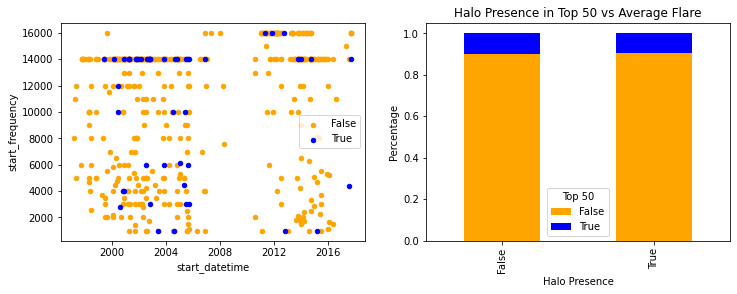

In [124]:
nasa = nasa.astype({'start_frequency': float}, errors='raise')
nasa["top_50"] = nasa["swt_map"]\
    .apply(lambda x: False if np.isnan(x) else True)

fig, ax = plt.subplots(1, 2)

# Graph for the frequency of halos in the top 50 solar flares as a percentage of the whole.
# 
# The intent of this plot is to depict how likely the classsification/size/strength of a flare is to 
# create a halo. This can be used to predict whether or not a flare will have a halo based on it's size.
#
# My interpretation of this plot is that the size of a flare has little to no effect on the presence of a 
# halo. As seen on the chart, the percent of flares in the top 50 is almost exactly the same given that 
# whether a halo occured or not.
nasa.groupby('is_halo')['top_50']\
    .value_counts(normalize=True)\
    .unstack(level=1)\
    .plot(ax=ax[1], kind='bar', stacked=True, color=['orange', 'blue'])\
    .legend(title='Top 50')

# Graph for frequency of flare at start by the start datetime.
# 
# The intent of this plot is to depict how much of an effect the start frequency of a flare has on its
# classification as a top flare. This can be used to predict how a flare will be classified based on its
# starting frequency.
#
# My interpretation of this plot is that the start frequency has little to no effect on the classification
# of a flare. As seen on the chart, the percent of flares in the top 50 is almost just as sparatic in
# frequency as those not in the top 50.
colors = {False:'orange', True:'blue'}

grouped = nasa.groupby('top_50')
for key, group in grouped:
    group.plot(ax=ax[0], kind='scatter', x='start_datetime', y='start_frequency', label=key, color=colors[key])

plt.xlabel("Halo Presence")
plt.ylabel("Percentage")
plt.title("Halo Presence in Top 50 vs Average Flare")

fig.set_figwidth(12)
plt.show()